# Cogs 108 Final Project

Bernard Suwirjo

Ben Hazarian

Cesar Reyes

Eric Jiang

Gauthier Pred'Astor Gris

In [2]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [3]:
# Load Datasets

# Basketball Dataset
nba_data = pd.read_csv('data/nba.games.stats.csv')

In [4]:
nba_data['Date'] = pd.to_datetime(nba_data['Date'])

In [5]:
one_season = nba_data.loc[(nba_data['Date'] >= '2016-10-25') & (nba_data['Date'] <= '2017-04-12')]
one_season = one_season.drop(columns = ['Date', 'Unnamed: 0'])
one_season['WINorLOSS'] = one_season['WINorLOSS'].eq('W').mul(1)
one_season.head()

,Team,Game,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
4920,ATL,1,Home,WAS,1,114,99,44,88,0.500,...,13,18,0.722,12,40,25,14,4,19,20
4921,ATL,2,Away,PHI,1,104,72,42,85,0.494,...,11,15,0.733,4,39,16,9,5,20,20
4922,ATL,3,Home,SAC,1,106,95,33,79,0.418,...,13,19,0.684,6,38,26,10,6,19,34
4923,ATL,4,Home,LAL,0,116,123,41,85,0.482,...,18,20,0.900,11,42,24,11,9,15,25
4924,ATL,5,Away,WAS,0,92,95,32,83,0.386,...,28,35,0.800,11,46,13,7,3,19,23


In [6]:
teams_ha = one_season.groupby(['Team', 'Home']).sum()

In [7]:
win_percentages = teams_ha['WINorLOSS']/41

Text(0, 0.5, 'Win %')

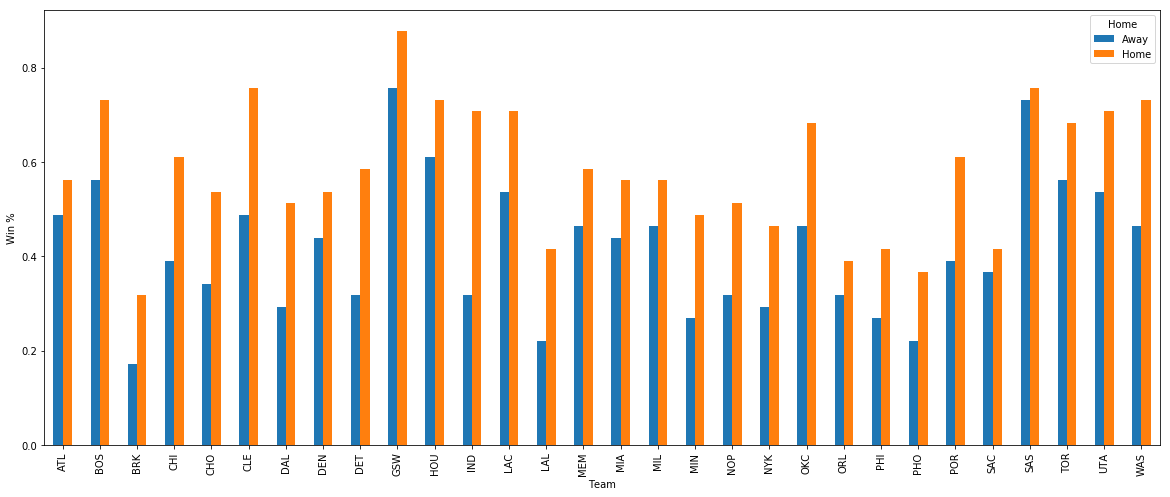

In [8]:
win_percent_team = win_percentages.unstack().plot.bar(figsize=(20,8))
win_percent_team.set_ylabel("Win %")

In [9]:
team_scores = one_season[['Team','WINorLOSS', 'Game', 'Home','TeamPoints', 'OpponentPoints']]
team_scores = team_scores[team_scores['WINorLOSS'] == 1]
team_scores['ScoreDiff'] = team_scores['TeamPoints'].sub(team_scores['OpponentPoints'], axis=0)

In [10]:
ha_win_score_diff = team_scores.groupby(['Team','Home']).mean()['ScoreDiff']

Text(0, 0.5, 'Avg Score Differential in Wins')

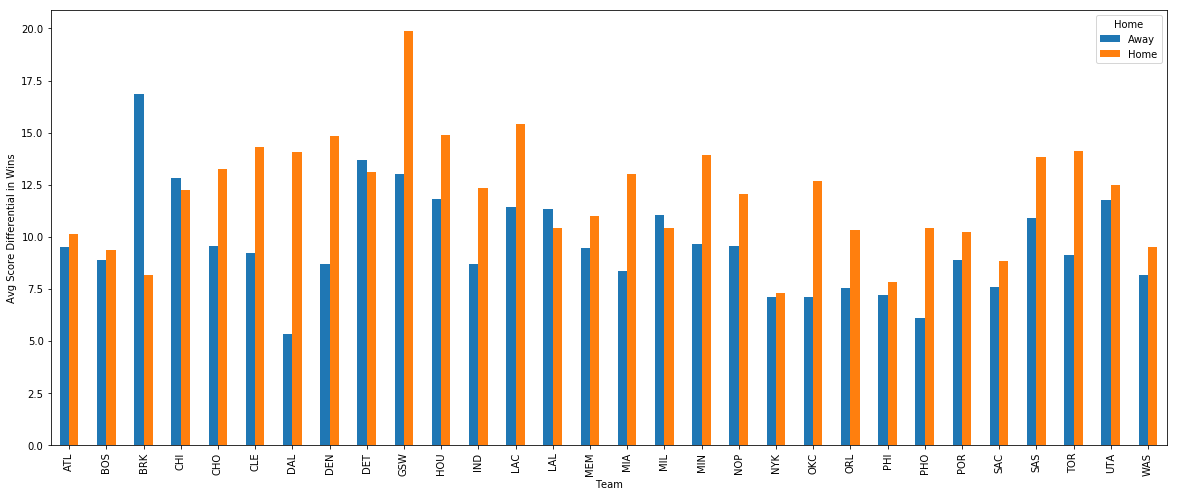

In [11]:
score_diff = ha_win_score_diff.unstack().plot.bar(figsize=(20,8))
score_diff.set_ylabel("Avg Score Differential in Wins")

In [12]:
df_ha = ha_win_score_diff.unstack()
len(df_ha.loc[df_ha['Home'] > df_ha['Away']])

25

In [13]:
home_greater = df_ha.loc[df_ha['Home'] > df_ha['Away']]
home_greater['Home'].mean() - home_greater['Away'].mean()

3.25724297549729

In [14]:
stats.ttest_ind(home_greater['Home'], home_greater['Away'], equal_var = False)

Ttest_indResult(statistic=4.860888174640401, pvalue=1.7247253869154674e-05)

There are 25 teams that have a greater score differential in home wins than away wins. The average score differential for these 25 teams is 3.257 points. Running a t-test at the 0.05 confidence level gives a p-value lower than 0.05, so we can reject the null hypothesis stating that there is no significant difference between the means of home and away wins. It is safe to say that the score differential difference is statistically significant.

In [17]:
#finda average TO per game split by home and away games for every team
to_ha = (teams_ha['Turnovers']/41).unstack()

In [18]:
#average TO per game, not split by home and away, for every team
avg_to = one_season.groupby('Team').sum()['Turnovers']/82

In [19]:
#calculates difference in average TO at home/away vs average TO overall
to_ha['Home TO Diff'] = to_ha['Home'].sub(avg_to, axis=0)
to_ha['Away TO Diff'] = to_ha['Away'].sub(avg_to, axis=0)

In [23]:
to_ha.loc[to_ha['Home TO Diff'] < 0].mean()['Home TO Diff']

-0.45853658536585384

In [25]:
to_ha.loc[to_ha['Away TO Diff'] < 0].mean()['Away TO Diff']

-0.28048780487804864

Teams that averaged less TO's at home averaged 0.4585 less TO's compared to theire seasonal average, while teams that averaged Less TO's away averaged 0.2805 less TO's compared to their seasonal average. 

Home
Away            1.737765
Home            1.601100
Home TO Diff    0.043169
Away TO Diff    0.043169
dtype: float64

In [28]:
stats.ttest_ind(to_ha.loc[to_ha['Away TO Diff'] < 0]['Away TO Diff'], 
                to_ha.loc[to_ha['Home TO Diff'] < 0]['Home TO Diff'], equal_var = False)

Ttest_indResult(statistic=1.7780215101087347, pvalue=0.08787410116740832)

There are 15 teams that average less TO's at home than they do on the season, and 15 that average less TO's away than they do on the season. However, when running the t-test for an significant difference between the TO differences, I got a p-value of 0.087, which is greater than 0.05. Therefore, we cannot say that turnovers are less frequent at home due to home court advantage. 